### 필요 라이브러리 다운

In [1]:
!pip install selenium
# selenium 없을 시 설치

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import time
from datetime import datetime, timedelta

In [48]:
import requests
from bs4 import BeautifulSoup as bs

### 크롤링 연습

In [49]:
url = 'http://search.daum.net/search?w=blog&f=section&SA=daumsec&lpp=10&nil_profile=vsearch&nil_src=blog&q=%ED%8A%B8%EB%9F%AC%ED%94%8C&DA=STC&period=w&sd=20200918153010&ed=20200925153010'

In [50]:
page = requests.get(url)
soup = bs(page.text,'html.parser')
all = soup.find('span',{'class':'txt_info'})
how_many=all.text

In [51]:
how_many.split('/')[1]

' 1건'

In [52]:
url = 'http://search.daum.net/search?nil_suggest=btn&w=blog&lpp=10&DA=STC&q={}&sd={}000000&ed={}235959&period=u'

In [53]:
URL = url.format('트러플',20200918,20200925)
URL

'http://search.daum.net/search?nil_suggest=btn&w=blog&lpp=10&DA=STC&q=트러플&sd=20200918000000&ed=20200925235959&period=u'

In [54]:
page = requests.get(URL)
soup = bs(page.text,'html.parser')
all = soup.find('span',{'class':'txt_info'})
how_many=all.text

In [55]:
how_many

'1-10 / 약 2,320건'

In [56]:
blank = how_many.split('/')[1].replace(" ","")
maybe = blank.replace("약","")
number = maybe.replace("건","")
nocom = number.replace(",","")
num = int(nocom)
num

2320

### 함수화해서 진행

In [105]:
def get_frequency(x,y):
    url = 'http://search.daum.net/search?nil_suggest=btn&w=blog&lpp=10&DA=STC&q={}&sd={}000000&ed={}235959&period=u'
    make_start = pd.to_datetime(str(y), format='%Y%m%d')
    make_end = make_start +timedelta(days=1)
    z = make_end.strftime("%Y%m%d")
    
    URL = url.format(x,y,z)
    page = requests.get(URL)
    time.sleep(1)
    
    soup = bs(page.text,'html.parser')
    time.sleep(1)
    
    whole = soup.find('div',{'class':'sub_expander'})
    find_number = whole.find('span',{'class':'txt_info'})
    found = find_number.text
    
    if found is None:
        return(0)
    else:
        split = found.split('/')[1]
        maybe = split.replace("약","")
        number = maybe.replace("건","")
        nocom = number.replace(",","")
        num = int(nocom)
        return(num)

In [106]:
def get_date_by_day(year,month,day,x):
    start_date = date(year,month,day)
    day_list = []
    for how_many in range(1,x+1):
        formattedDate = start_date.strftime("%Y%m%d")
        day_list.append(formattedDate)
        start_date += timedelta(days=1)
    return(day_list)

In [107]:
start_list = get_date_by_day(2018,7,8,365)

In [108]:
frequency=[]

for day in start_list:
    start = int(day)
    frequency.append(get_frequency('트러플',start))

In [110]:
len(frequency)

365

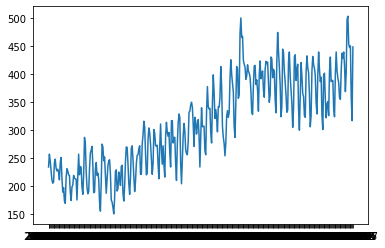

In [111]:
fig,ax = plt.subplots()
ax.plot(start_list,frequency)